In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#IMPORTING THE WHOLE DATASET

df = pd.read_pickle('choy_data.pkl')
df.head()

,heat index,humidity,moisture,soil_sens,temperature,wind,light,date,time
0,27.368090,72.0,38.599998,2077.600098,26.000000,12.553803,5.934079,2020-12-26,12:09:31
1,25.590635,73.0,37.900002,2083.399902,26.000000,13.458583,8.163333,2020-12-26,12:10:23
2,25.590635,72.0,37.900002,2085.699951,24.877772,3.153467,8.426666,2020-12-26,12:11:16
3,27.368090,72.0,38.299999,2085.300049,26.000000,13.910973,7.373333,2020-12-26,12:11:52
4,27.368090,72.0,38.099998,2077.600098,26.000000,12.044867,7.241666,2020-12-26,12:12:47


In [9]:
#EXTRACTING TEMPERATURE, HUMIDITY AND HEAT INDEX DATA

df_hth = pd.read_pickle('data_hth.pkl')
df_hth.rename(columns = {'humidity': 'relative humidity'}, inplace=True)
df_hth.head()

,relative humidity,temperature,heat
1,73.0,26.000000,25.6
2,72.0,24.877772,25.6
7,73.0,26.000000,25.6
8,73.0,26.000000,25.6
9,73.0,26.000000,25.6


In [8]:
#COMPUTING DAILY AVERAGE VALUES

dfavg = df.copy()
dfavg = dfavg[['humidity', 'temperature', 'heat index', 'date']]
dfavg = dfavg.groupby('date').mean()[['humidity', 'temperature', 'heat index']]
dfavg.head()

,humidity,temperature,heat index
date,,,
2020-12-26,74.022619,25.302235,25.851988
2020-12-27,75.566842,25.110261,25.990551
2020-12-28,76.477046,25.333412,26.030821
2020-12-31,72.916823,24.999872,25.459298
2021-01-01,73.771297,25.010912,25.521175


### Time series plot of data attributes

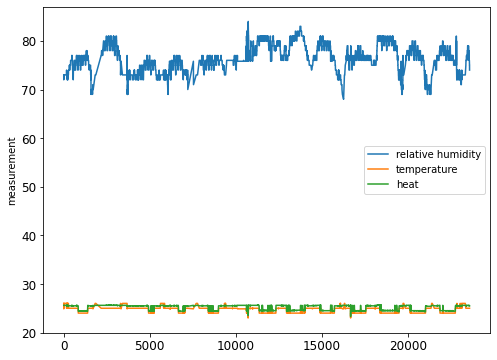

In [8]:
tseries = df2.plot(grid=False, figsize=(8,6), fontsize=12, ylabel='measurement')
#fig1 = graph1.get_figure()
#fig1.savefig("fig1.png")

### Average values for data attributes

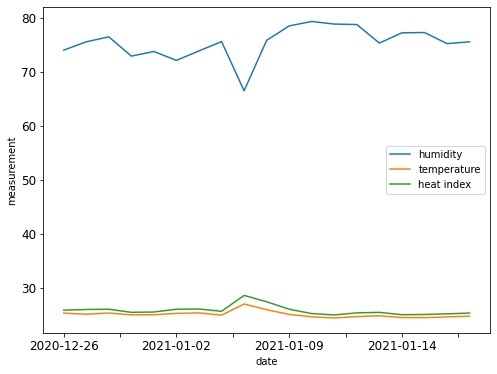

In [10]:
avg_plot = dfavg.plot(grid=False, figsize=(8,6), ylabel='measurement', fontsize=12)
#fig2 = graph2.get_figure()
#fig2.savefig("fig2.png")

### Visualizing distributions with histograms

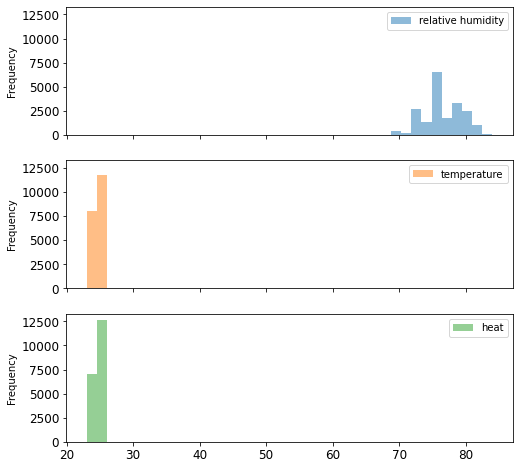

In [12]:
hist_plot = df_hth.plot.hist(subplots=True, layout=(3, 1), fontsize=12, figsize=(8, 8), sharex=True, sharey=True, grid=False, bins=40, alpha=0.5);
#fig3 = graph3[0].get_figure()
#fig3.savefig("fig3.png")

### Visualizing distributions with boxplots

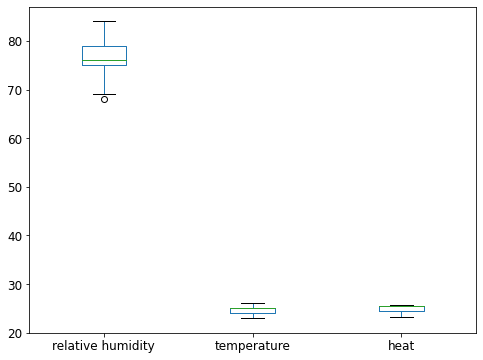

In [14]:
box_plot = df_hth.boxplot(grid=False,fontsize=12, figsize=(8, 6))
#fig4 = graph4.get_figure()
#fig4.savefig("fig4.png")

### Visualizing correlations

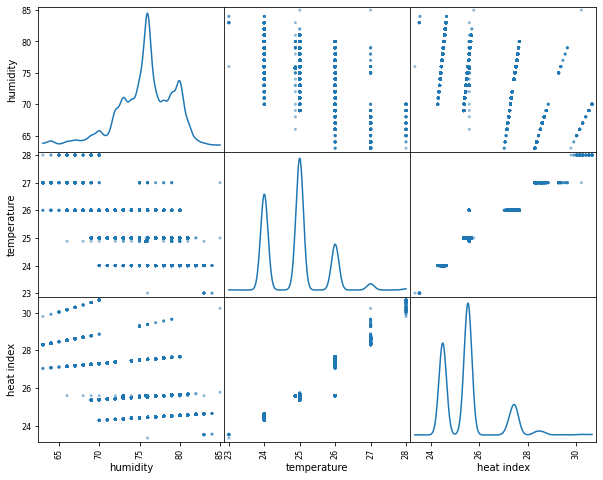

In [13]:
pd.plotting.scatter_matrix(df_hth, diagonal='kde', figsize=(10,8) );

In [19]:
corr = df_hth.corr()
corr

,relative humidity,temperature,heat
relative humidity,1.000000,-0.470903,-0.344017
temperature,-0.470903,1.000000,0.948944
heat,-0.344017,0.948944,1.000000


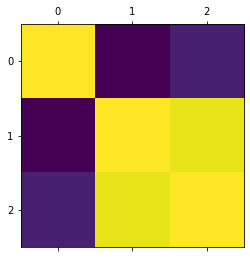

In [21]:
plt.matshow(df_hth.corr())
plt.show()

In [17]:
##Heat variations within a day
#t_table = pd.pivot_table(dfavg, values='temperature', index=['time'],
#                    columns=['date'])
#t_table;